In [1]:
from warnings import filterwarnings; filterwarnings('ignore')
from numpy.random import seed; seed(42)
from keras.utils import set_random_seed; set_random_seed(42)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
from google.colab import files
uploaded = files.upload()


Saving mall_customers_dataset.xlsx to mall_customers_dataset.xlsx


In [49]:
df = pd.read_excel("mall_customers_dataset.xlsx")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


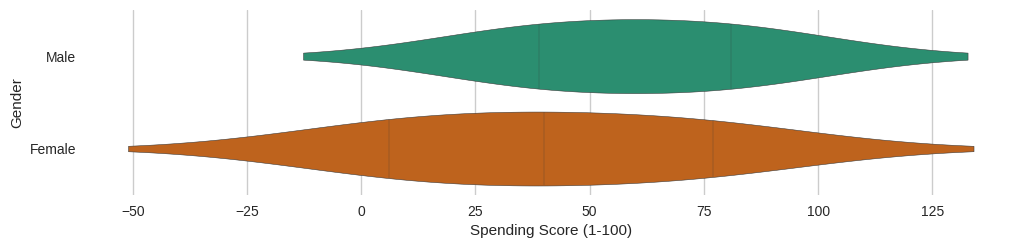

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_66['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_66, x='Spending Score (1-100)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:
df = df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [57]:
highest_spending_income = df.loc[df['Spending Score (1-100)'].idxmax()]['Annual Income (k$)']
lowest_spending_income = df.loc[df['Spending Score (1-100)'].idxmin()]['Annual Income (k$)']
print(f"Annual income for the highest spending score: {highest_spending_income}")
print(f"Annual income for the lowest spending score: {lowest_spending_income}")

Annual income for the highest spending score: 19
Annual income for the lowest spending score: 78


In [56]:
highest_spending = df[df['Spending Score (1-100)'] == df['Spending Score (1-100)'].max()]
lowest_spending = df[df['Spending Score (1-100)'] == df['Spending Score (1-100)'].min()]
print("Highest spending sheet:")
print(highest_spending)
print("\nLowest spending sheet:")
print(lowest_spending)

Highest spending sheet:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
11          12       1   35                  19                      99

Lowest spending sheet:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
156         157       0   37                  78                       1
158         159       0   34                  78                       1


In [55]:
avg_spending_by_age = df.groupby('Age')['Spending Score (1-100)'].mean()
highest_spending_age = avg_spending_by_age.idxmax()
print(f"The age group with the highest average spending score is: {highest_spending_age}")

The age group with the highest average spending score is: 39


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


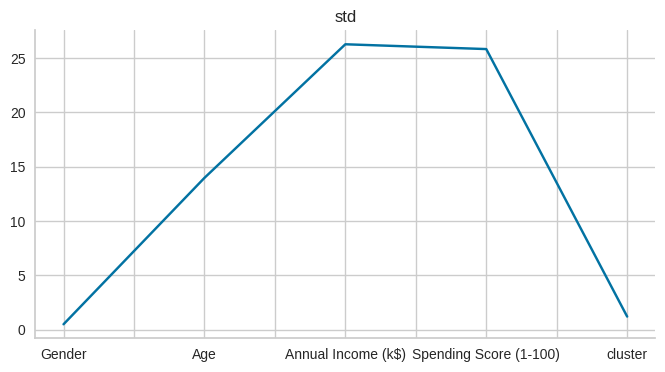

In [41]:
from matplotlib import pyplot as plt
_df_44['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

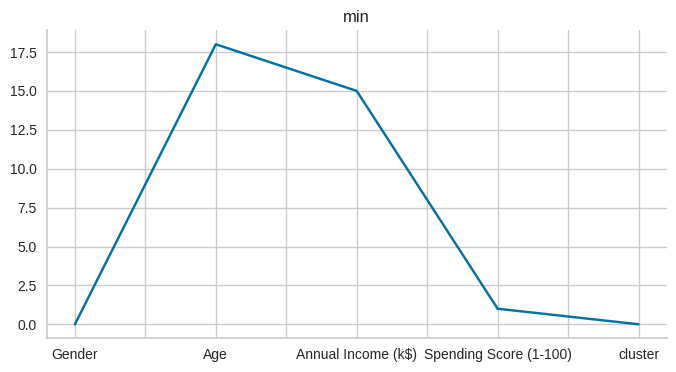

In [40]:
from matplotlib import pyplot as plt
_df_45['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

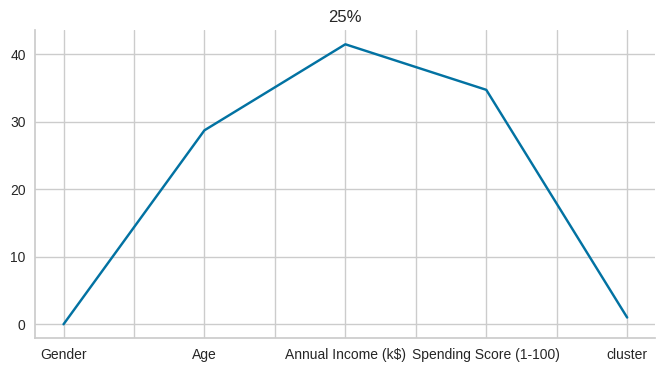

In [39]:
from matplotlib import pyplot as plt
_df_46['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

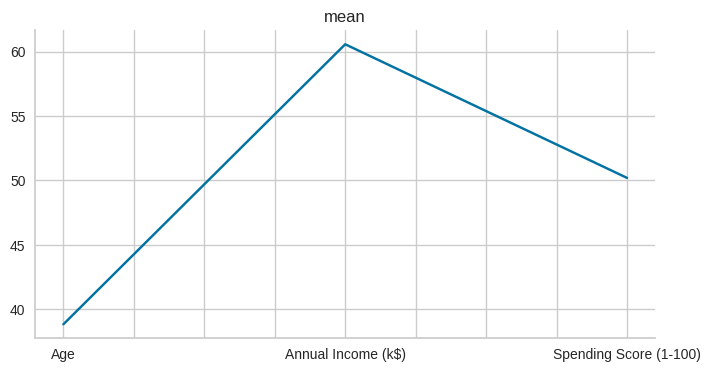

In [37]:
from matplotlib import pyplot as plt
_df_27['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
df.duplicated().sum()

0

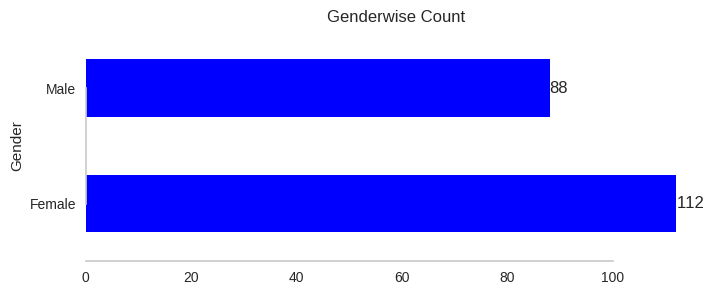

In [19]:
data = df['Gender'].value_counts().plot.barh(figsize=(8,3), color='blue', title='Genderwise Count', grid=False)
plt.bar_label(data.containers[0])
sns.despine(trim=True);

In [51]:
df['Gender'] = df['Gender'].factorize()[0]
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


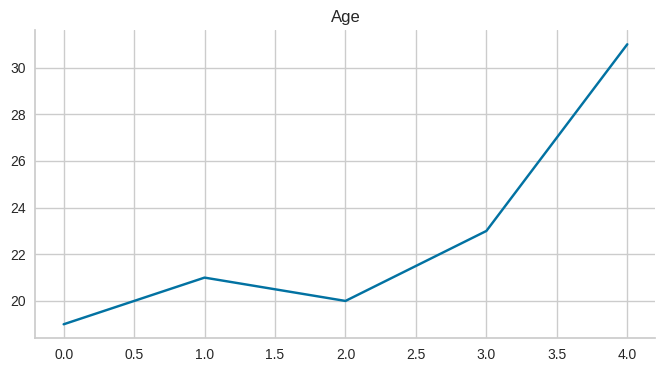

In [36]:
from matplotlib import pyplot as plt
_df_12['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

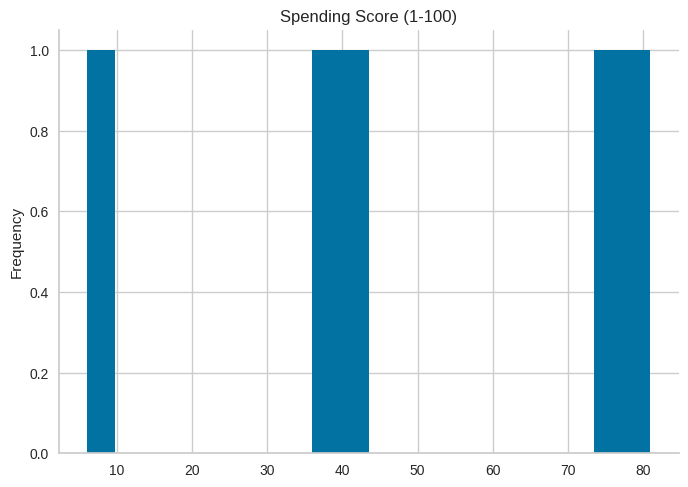

In [35]:
from matplotlib import pyplot as plt
_df_3['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

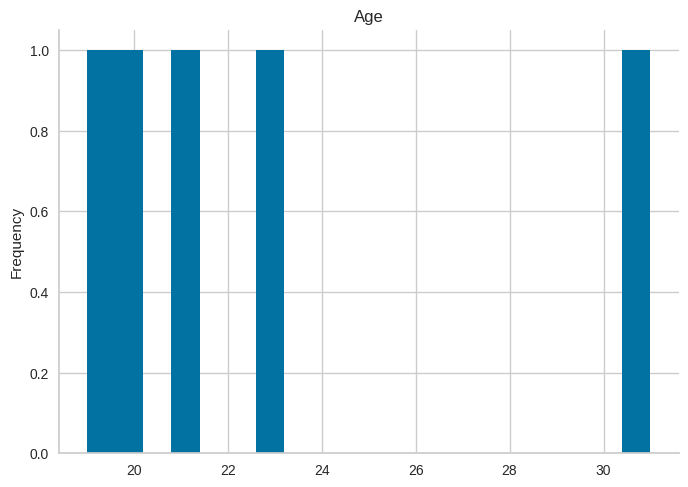

In [34]:
from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

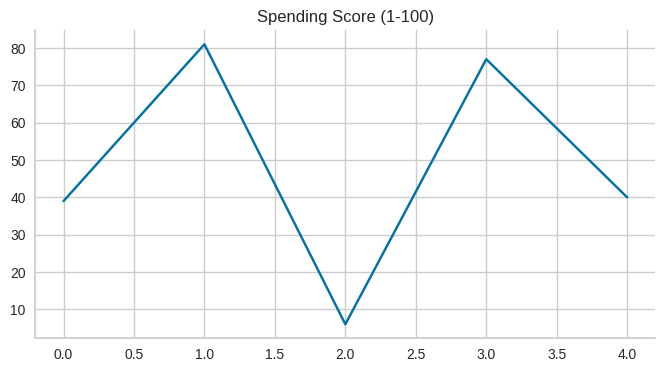

In [32]:
from matplotlib import pyplot as plt
_df_14['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

[Text(0, 0, '112'), Text(0, 0, '88')]

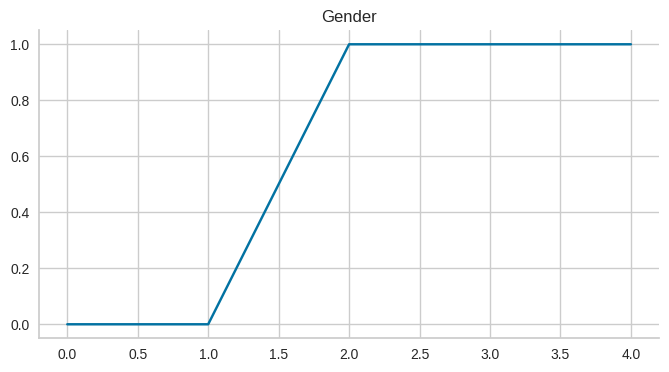

In [43]:
from matplotlib import pyplot as plt
_df_11['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.bar_label(data.containers[0])

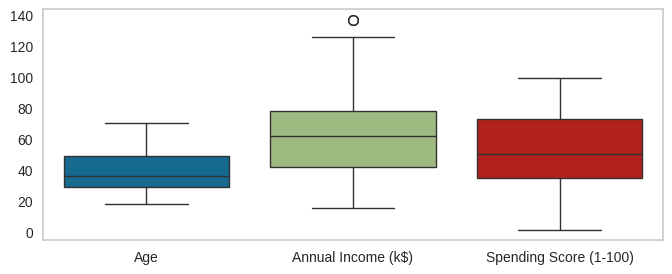

In [21]:
plt.figure(figsize=(8,3))
plt.grid(False)
sns.boxplot(data=df.drop(columns='Gender', axis=1))
plt.show()

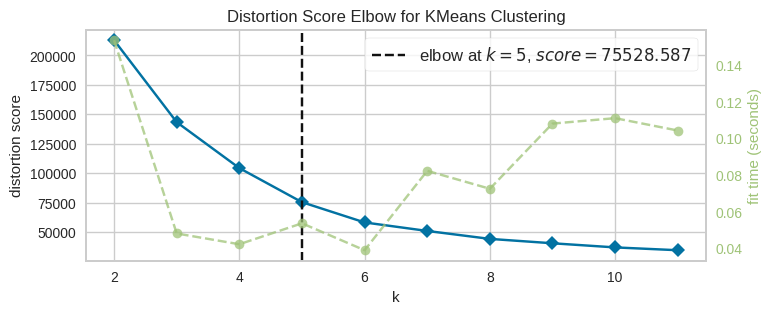

In [22]:
plt.figure(figsize=(8,3))
visual = KElbowVisualizer(estimator=KMeans(), k=(2,12))
visual.fit(df)
visual.show();

In [23]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(df)

KMeans(n_clusters=5, random_state=42)

In [24]:
print("Silhouette Score:", (silhouette_score(df, model.predict(df)) * 100).round(2))

Silhouette Score: 44.41


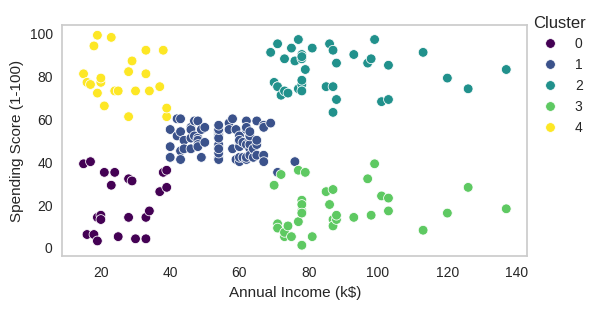

In [27]:
df['cluster'] = model.labels_
plt.figure(figsize=(6,3))
plt.grid(False)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='viridis')
plt.legend(title='Cluster', loc=(1, 0.5))
plt.show()
